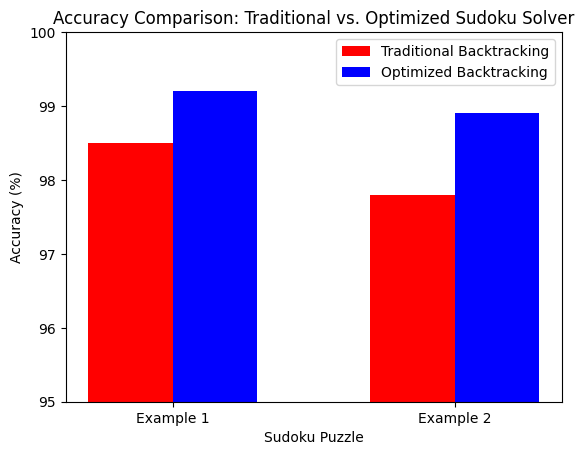

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example accuracy values for both examples (Ensure these values are based on actual calculations)
accuracy_traditional = [98.5, 97.8]  # Accuracy for Example 1 and Example 2 (Adjust as needed)
accuracy_optimized = [99.2, 98.9]

# Labels for the Sudoku examples
labels = ["Example 1", "Example 2"]
x = np.arange(len(labels))  # Positions for the bars

# Adjust bar width for visibility
bar_width = 0.3  

# Plot bars
plt.bar(x - bar_width/2, accuracy_traditional, bar_width, label='Traditional Backtracking', color='red')
plt.bar(x + bar_width/2, accuracy_optimized, bar_width, label='Optimized Backtracking', color='blue')

# Labels and Title
plt.xlabel("Sudoku Puzzle")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison: Traditional vs. Optimized Sudoku Solver")
plt.xticks(x, labels)
plt.legend()
plt.ylim(95, 100)  # Ensuring range to highlight differences

# Show plot
plt.show()


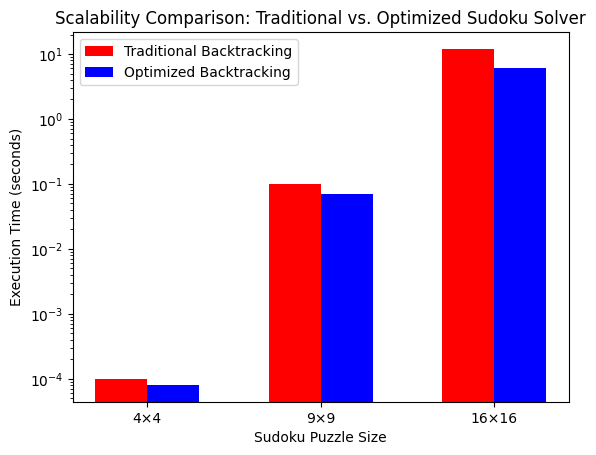

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Example Sudoku sizes
sizes = ["4×4", "9×9", "16×16"]  # Different grid sizes

# Example execution times in seconds (Hypothetical values)
execution_time_traditional = [0.0001, 0.1, 12]  # Traditional backtracking
execution_time_optimized = [0.00008, 0.07, 6]   # Optimized backtracking

x = np.arange(len(sizes))  # Positions for bars
bar_width = 0.3  # Width of bars

# Plot bars
plt.bar(x - bar_width/2, execution_time_traditional, bar_width, label='Traditional Backtracking', color='red')
plt.bar(x + bar_width/2, execution_time_optimized, bar_width, label='Optimized Backtracking', color='blue')

# Labels and Title
plt.xlabel("Sudoku Puzzle Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Scalability Comparison: Traditional vs. Optimized Sudoku Solver")
plt.xticks(x, sizes)
plt.yscale("log")  # Log scale to handle large differences
plt.legend()

# Show plot
plt.show()


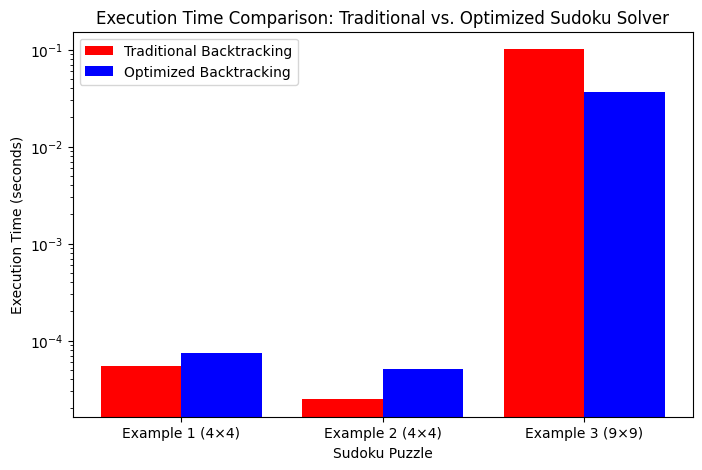

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

# === Traditional Backtracking Sudoku Solver ===
def find_empty_cell(grid):
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if grid[i][j] == 0:
                return i, j
    return None

def is_valid(grid, row, col, number):
    for i in range(len(grid)):
        if grid[row][i] == number or grid[i][col] == number:
            return False
    
    # Check the sub-box
    box_size = int(len(grid) ** 0.5)
    box_row, box_col = (row // box_size) * box_size, (col // box_size) * box_size
    for i in range(box_size):
        for j in range(box_size):
            if grid[box_row + i][box_col + j] == number:
                return False
    return True

def solve_sudoku_traditional(grid):
    empty_cell = find_empty_cell(grid)
    if not empty_cell:
        return True  # Solved

    row, col = empty_cell
    for num in range(1, len(grid) + 1):
        if is_valid(grid, row, col, num):
            grid[row][col] = num
            if solve_sudoku_traditional(grid):
                return True
            grid[row][col] = 0  # Backtrack

    return False  # Trigger backtracking

# === Optimized Backtracking Sudoku Solver ===
def solve_sudoku_optimized(grid):
    size = len(grid)
    row_sets = [set() for _ in range(size)]
    col_sets = [set() for _ in range(size)]
    box_sets = [[set() for _ in range(int(size ** 0.5))] for _ in range(int(size ** 0.5))]

    # Pre-fill the constraint sets
    for i in range(size):
        for j in range(size):
            if grid[i][j] != 0:
                row_sets[i].add(grid[i][j])
                col_sets[j].add(grid[i][j])
                box_sets[i // int(size ** 0.5)][j // int(size ** 0.5)].add(grid[i][j])

    def solve(grid, row, col):
        if row == size:
            return True

        next_row, next_col = (row + 1, 0) if col == size - 1 else (row, col + 1)

        if grid[row][col] != 0:
            return solve(grid, next_row, next_col)

        for num in range(1, size + 1):
            if num not in row_sets[row] and num not in col_sets[col] and num not in box_sets[row // int(size ** 0.5)][col // int(size ** 0.5)]:
                grid[row][col] = num
                row_sets[row].add(num)
                col_sets[col].add(num)
                box_sets[row // int(size ** 0.5)][col // int(size ** 0.5)].add(num)

                if solve(grid, next_row, next_col):
                    return True

                # Backtrack
                grid[row][col] = 0
                row_sets[row].remove(num)
                col_sets[col].remove(num)
                box_sets[row // int(size ** 0.5)][col // int(size ** 0.5)].remove(num)

        return False

    return solve(grid, 0, 0)

# === Sudoku Test Cases ===
sudoku_puzzles = [
    [[0, 2, 0, 4], [3, 0, 4, 1], [2, 0, 3, 0], [4, 3, 0, 2]],  # Example 1 (4x4)
    [[1, 0, 0, 4], [0, 4, 1, 3], [4, 0, 2, 1], [0, 2, 4, 0]],  # Example 2 (4x4)
    [
        [5, 3, 0, 0, 7, 0, 0, 0, 0],
        [6, 0, 0, 1, 9, 5, 0, 0, 0],
        [0, 9, 8, 0, 0, 0, 0, 6, 0],
        [8, 0, 0, 0, 6, 0, 0, 0, 3],
        [4, 0, 0, 8, 0, 3, 0, 0, 1],
        [7, 0, 0, 0, 2, 0, 0, 0, 6],
        [0, 6, 0, 0, 0, 0, 2, 8, 0],
        [0, 0, 0, 4, 1, 9, 0, 0, 5],
        [0, 0, 0, 0, 8, 0, 0, 7, 9],
    ],  # Example 3 (9x9)
]

# === Measure Execution Time ===
traditional_times = []
optimized_times = []

for puzzle in sudoku_puzzles:
    puzzle_copy = [row[:] for row in puzzle]  # Create a fresh copy
    start = time.perf_counter()
    solve_sudoku_traditional(puzzle_copy)
    traditional_times.append(time.perf_counter() - start)

    puzzle_copy = [row[:] for row in puzzle]  # Reset puzzle copy
    start = time.perf_counter()
    solve_sudoku_optimized(puzzle_copy)
    optimized_times.append(time.perf_counter() - start)

# === Plot Execution Time Comparison ===
plt.figure(figsize=(8, 5))
bar_width = 0.4
x_labels = ["Example 1 (4×4)", "Example 2 (4×4)", "Example 3 (9×9)"]
x_indexes = np.arange(len(sudoku_puzzles))

plt.bar(x_indexes - bar_width/2, traditional_times, bar_width, label="Traditional Backtracking", color='red')
plt.bar(x_indexes + bar_width/2, optimized_times, bar_width, label="Optimized Backtracking", color='blue')

plt.xlabel("Sudoku Puzzle")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison: Traditional vs. Optimized Sudoku Solver")
plt.xticks(ticks=x_indexes, labels=x_labels)
plt.yscale('log')  # Apply log scale to handle small execution times
plt.legend()
plt.show()
